# LIBRARIES


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# INISIASI DATASET


In [2]:
# import
SENTIMENT_DATASET_FILE_NAME = "sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"outputs/{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"labelled dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))
sentiment = DATA_FRAME_SENTIMENT_DATASET

labelled dataset: 3239 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,sentiment_label
3238,1689531424054104064,arnold_sptr33,Arnold Saputra,1831181867472867445,@meraaahputiiih Pemindahan ibu kota mengilhami...,Wed Sep 04 04:05:53 +0000 2024,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,False,pemindahan kota mengilhami menjaga keanekaraga...,pindah kota ilham jaga keanekaragaman hayati,pindah kota ilham jaga keanekaragaman hayati,-0.2626,negatif


# EKSTRAKSI FITUR


In [3]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sentiment['preprocessed_text'])

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# CHI2


In [4]:
k_best_features = 1000
selector = SelectKBest(chi2, k=k_best_features)
X_chi2 = selector.fit_transform(df_tfidf, sentiment["sentiment_label"])

selected_feature_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]

In [5]:
X = X_chi2
y = sentiment["sentiment_label"]

# DATA SPLIT (90% TRAIN, 10% TEST)


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=42)

# KNN InSet


| k = 1 |
| accuracy: 0.83 |
| precision: 0.8298455126285315 |
| recall: 0.8271604938271605 |
| f1: 0.8211033936528891 |
              precision    recall  f1-score   support

     negatif       0.83      0.93      0.88       189
      netral       0.89      0.56      0.68        45
     positif       0.80      0.74      0.77        90

    accuracy                           0.83       324
   macro avg       0.84      0.74      0.78       324
weighted avg       0.83      0.83      0.82       324



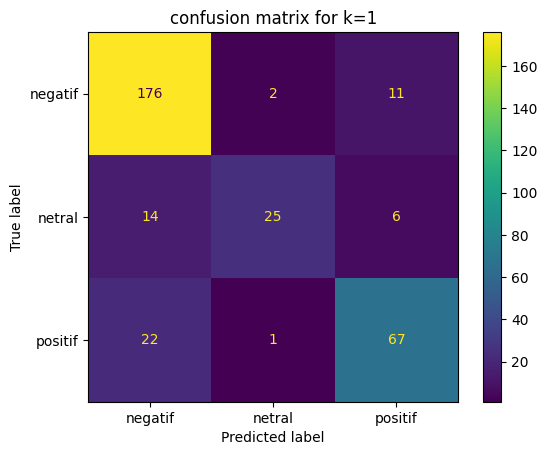

| k = 3 |
| accuracy: 0.80 |
| precision: 0.8168463480963482 |
| recall: 0.8024691358024691 |
| f1: 0.7903057472900211 |
              precision    recall  f1-score   support

     negatif       0.77      0.96      0.86       189
      netral       0.88      0.47      0.61        45
     positif       0.88      0.64      0.74        90

    accuracy                           0.80       324
   macro avg       0.84      0.69      0.74       324
weighted avg       0.82      0.80      0.79       324



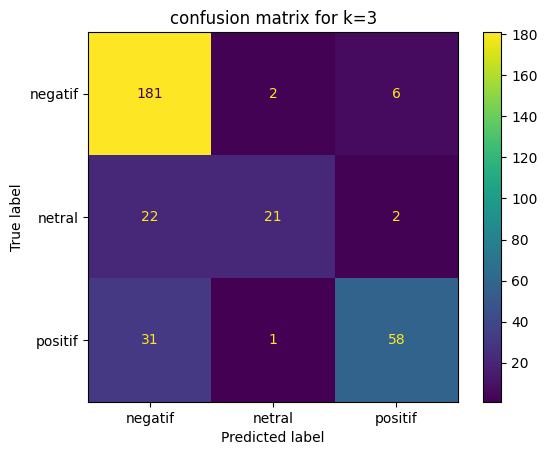

| k = 5 |
| accuracy: 0.76 |
| precision: 0.7904912999075822 |
| recall: 0.7623456790123457 |
| f1: 0.7379440242730642 |
              precision    recall  f1-score   support

     negatif       0.73      0.97      0.83       189
      netral       0.88      0.31      0.46        45
     positif       0.88      0.56      0.68        90

    accuracy                           0.76       324
   macro avg       0.83      0.61      0.66       324
weighted avg       0.79      0.76      0.74       324



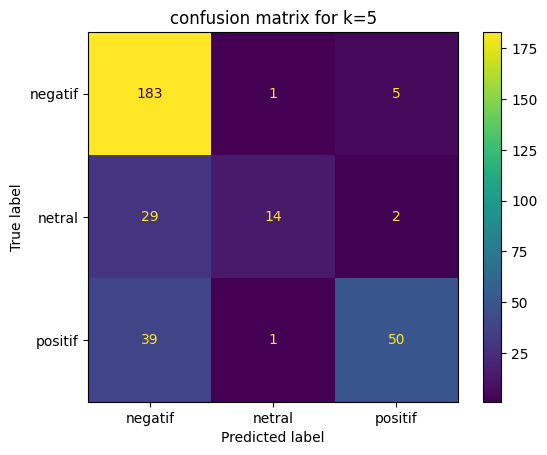

| k = 7 |
| accuracy: 0.75 |
| precision: 0.7686924042686755 |
| recall: 0.7469135802469136 |
| f1: 0.7201735663443174 |
              precision    recall  f1-score   support

     negatif       0.72      0.96      0.82       189
      netral       0.87      0.29      0.43        45
     positif       0.81      0.53      0.64        90

    accuracy                           0.75       324
   macro avg       0.80      0.59      0.63       324
weighted avg       0.77      0.75      0.72       324



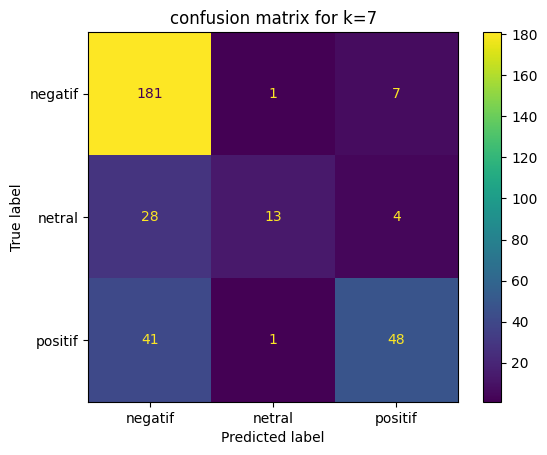

In [7]:
def train_evaluate_knn(k, X_train, Y_train, X_test, Y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"| k = {k} |")
    print(f"| accuracy: {accuracy:.2f} |")
    print(f"| precision: {precision} |")
    print(f"| recall: {recall} |")
    print(f"| f1: {f1} |")
    print(classification_report(Y_test, y_pred, target_names=knn.classes_))
    
    cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"confusion matrix for k={k}")
    plt.show()
    
    return knn

knn1 = train_evaluate_knn(1, X_train, Y_train, X_test, Y_test)
knn3 = train_evaluate_knn(3, X_train, Y_train, X_test, Y_test)
knn5 = train_evaluate_knn(5, X_train, Y_train, X_test, Y_test)
knn7 = train_evaluate_knn(7, X_train, Y_train, X_test, Y_test)

# DUMP KNN MODEL AND TF-IDF VECTORIZER


In [8]:
def save_model(model, filename):
    with open(filename, 'wb') as model_file:
            pickle.dump(model, model_file)

save_model(knn1, 'models/9010/knn1_9010_model.pkl')
# save_model(knn3, 'models/9010/knn3_9010_model.pkl')
# save_model(knn5, 'models/9010/knn5_9010_model.pkl')
# save_model(knn7, 'models/9010/knn7_9010_model.pkl')

save_model(vectorizer, 'models/tf-idf/tfidf_vectorizer.pkl')
save_model(selector, 'models/chi2/chi2_selector.pkl')